In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("long_df.csv")

In [3]:
df = df.fillna(0)
df.columns
df["sez"] = np.where(df["ent"] > 0,1,0)


In [4]:
df["egdp"].isin([0]).any()

False

In [5]:
df["pop"].isin([0]).any()

False

In [6]:
print(df[['egdp', 'pop']].min())

egdp     0.270584
pop     26.553768
dtype: float64


In [7]:
offset = 1000000 
df["egdppc"] = (df["egdp"]/df["pop"]) + offset
mask = df['egdppc'] == 0 
df = df[~mask]
df["lnegdppc"] = np.log(df["egdppc"])

In [8]:
mask2 = df["ntl_"] == 0
df = df[~mask2] 
df["ntlpc"] = (df["ntl_"]/df["pop"]) + offset
df["lnntlpc"] = np.log(df["ntlpc"])

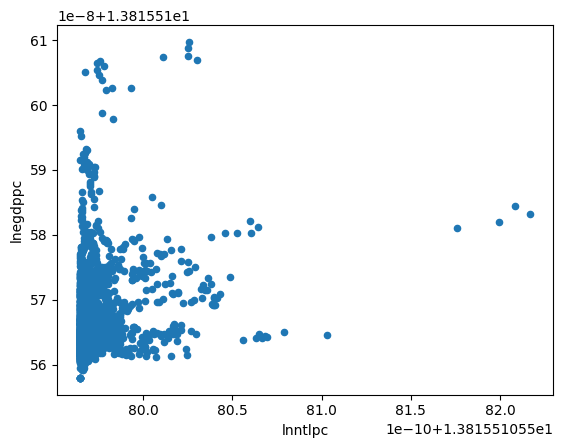

In [9]:
df.plot(x="lnntlpc", y="lnegdppc", kind="scatter");

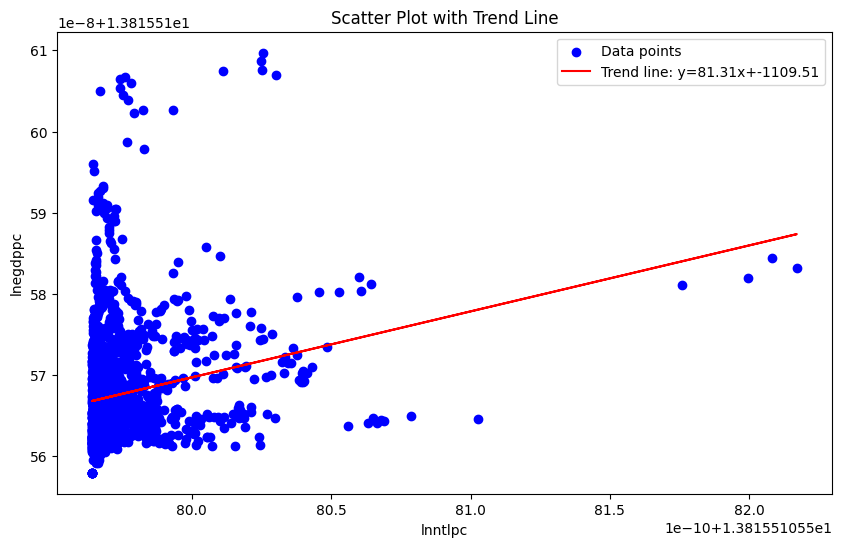

In [10]:
slope, intercept = np.polyfit(df['lnntlpc'], df['lnegdppc'], 1)
trend_line = slope * df['lnntlpc'] + intercept

# Step 2: Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['lnntlpc'], df['lnegdppc'], color='blue', label='Data points')

# Step 3: Add the regression line
plt.plot(df['lnntlpc'], trend_line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}')

# Enhance plot
plt.title('Scatter Plot with Trend Line')
plt.xlabel('lnntlpc')
plt.ylabel('lnegdppc')
plt.legend()

plt.show()

In [11]:
df['lnntlpc'].corr(df['lnegdppc'])

0.22208121447832124

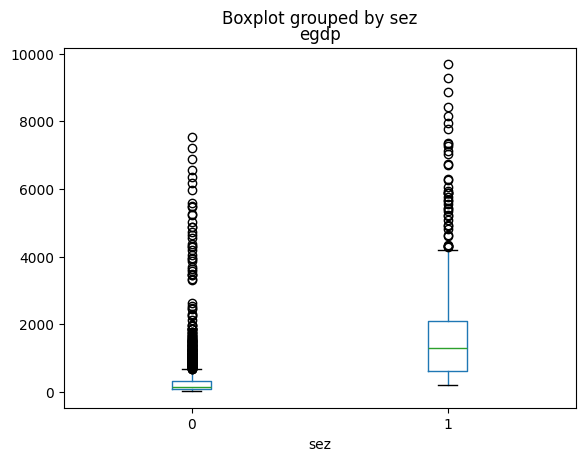

In [12]:
df['sez'] = np.where(df['ent'] > 1, 1, 0)

boxplot = df.boxplot(by='sez', column=['egdp'], grid=False)

<Axes: title={'center': 'lnegdppc'}, xlabel='sez'>

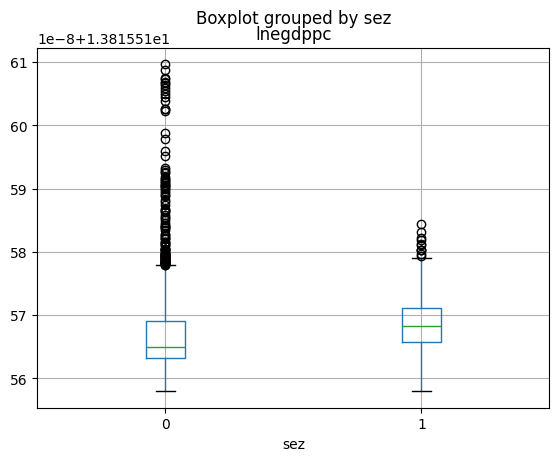

In [13]:
df.boxplot(by="sez", column="lnegdppc")

In [14]:
df.to_csv("long_df_manipulated.csv")

In [15]:
df

,id,year,shapeName,inv,ob_f_,tec_f_,adm_f_,ob_m_,tec_m_,adm_m_,...,agr_,urb_,ntl_,egdp,len,sez,egdppc,lnegdppc,ntlpc,lnntlpc
0,0,2000,Constanza,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.049457,803.557911,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
1,1,2000,Sabana De La Mar,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.012013,126.628351,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
2,2,2000,Moca,2.041761e+07,3093.0,89.0,129.0,2502.0,246.0,44.0,...,0.000000,0.000000,0.218282,669.913900,11.0,1,1.000000e+06,13.815511,1.000000e+06,13.815511
3,3,2000,Bayaguana,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.008230,314.809532,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
4,4,2000,El Factor,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.007903,81.014273,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2746,154,2016,Pedernales,1.200000e+07,349.0,0.0,10.0,284.0,5.0,5.0,...,6.906814,192.743295,0.050156,342.751808,25.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
2748,156,2016,La RomanaLa Romana,2.164133e+08,4430.0,312.0,235.0,1796.0,384.0,341.0,...,295.933917,1985.128940,5.088084,2568.506815,38.0,1,1.000000e+06,13.815511,1.000000e+06,13.815511
2751,159,2016,San Luis,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,69.615006,122.936406,3.067744,885.647811,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
2752,160,2016,San Victor,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,10.510256,153.145716,1.265729,751.863176,0.0,0,1.000000e+06,13.815511,1.000000e+06,13.815511
